# Прогнозирование критериев отбора бурёнок в поголовье молочного хозяйства «Вольный луг»

**Описание проекта**: Фермер, владелец молочного хозяйства «Вольный луг», хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям. 

**Цель исследования**: Разработаьть две прогнозные модели для отбора бурёнок в поголовье:
- *Первая* будет прогнозировать возможный удой коровы (целевой признак Удой);
- *Вторая* будет рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

**Ход исследования:**

- *Шаг 1.* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
- *Шаг 2.* Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- *Шаг 3.* Исследовательский анализ данных: статистический анализ всех признаков.
- *Шаг 4.* Корреляционный анализ признаков в данных.
- *Шаг 5.* Задача регрессии: модели простой линейной регрессии для прогноза возможного удоя.
- *Шаг 6.* Задача классификации: модель логистической регрессии для оценки вкуса молока.
- *Шаг 7.* Выводы.

**Общий вывод**: По итогам проведенного анализа удастся сформулировать рекомендации относительно критериев отбора новых бурёнок, а разработанные модели машинного обучения помогут фермеру управлять рисками и принимать объективное решение об их покупке для расширения стада, учитывая их удой и вкус молока. 

**Описание данных:**

**Файл `ferma_main.csv`** 
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**Файл `ferma_dad.csv`** 
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

**Файл `cow_buy.csv`** 
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [175]:
# Импортируем библиотеки, которые понадобятся для работы над проектом. 

# для датафрейма 
import pandas as pd
import numpy as np
from datetime import datetime, date, time

# для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns

# для статистики
from scipy import stats as st

# для машинного обучения
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

# метрики
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, precision_recall_curve


## Загрузка данных

In [176]:
# Функция вывода основной информации о файлах-датафреймах

def main_info(df):
    # Информация о структуре датафрейма
    print("Информация о структурах:")
    print(df.info())
    print("\n")
    
    # Статистическое описание колонок
    print("Статистика:")
    print(df.describe().T)
    print("\n")
    
    # Первые десять строк датафрейма
    print("Первые строки:")
    print(df.head(10))
    print("\n\n")

In [177]:
# Считаем данные из csv-файлов в датафрейм и сохраним в переменные. 

try:
    farm = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    farm = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
    
try:
    dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
    
try:
    buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

In [178]:
# Выведем основную информацию о датафрейме farm

main_info(farm)


Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object

**Комментарии**

Признаки в датасете `ferma_main.csv` можно разделить на группы.
- *Характеристики коровы:* id, Порода, порода папы_быка, Возраст.
- *Характеристики корма:* ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- *Характеристика пастбища:* Тип пастбища.
- *Характеристики молока:* Удой, кг, Жирность,%, Белок,%, Вкус молока.

Согласно общим характеристикам в датафрейме отсутствуют пропуски, это радует, но для дальнейшей работы необходимо переименовать названия столбцов и изменить тип данных в столбцах, где находятся числовые данные, а назначет тип `object`. Кроме того, чтобы обработать значения в этих колонках требуется заменить запятые на точки при разделении целой части от дробной.

In [179]:
# Выведем основную информацию о датафрейме dad

main_info(dad)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


Статистика:
    count   mean        std  min    25%    50%    75%    max
id  629.0  315.0  181.72094  1.0  158.0  315.0  472.0  629.0


Первые строки:
   id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин
5   6     Барин
6   7  Соловчик
7   8  Геркулес
8   9    Буйный
9  10     Барин





**Комментарии**

Пропусков в данных в файле `ferma_dad.csv`также нет, необходимо только переименовать название столбцов.

In [180]:
# Выведем основную информацию о датафрейме buy

main_info(buy)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


Статистика:
                        count unique              top freq
Порода                     20      2  РефлешнСоверинг   11
Тип пастбища               20      2        равнинное   11
порода папы_быка           20      2          Соверин   12
Имя_папы                   20      4           Буйный    8
Текущая_жирность,%         20     12      

**Комментарии**

Пропусков в данных в файле `cow_buy.csv` нет, необходимо переименовать названия столбцов и изменить тип данных на числовой для столбцов `Текущая_жирность,%` и `Текущий_уровень_белок,%`, также поменяв запятые на точки.

**Выводы**

Полученные данные мы сохранили в три переменные: `farm` для датафрейма с данными о стаде фермера на текущий момент, `dad` для данных о быках-папах каждой коровы в стаде фермера, и `buy` для данных о коровах "ЭкоФермы". В данных отсутствуют пропуски, на текщем этапе данные соответствуют описанию задачи. 


##  Предобработка данных

### Переименовывание названий столбцов

In [181]:
# Назначаем новые имена столбцов в датафреме farm

new_column_farm = ['id', 'milk', 'efu', 'protein', 'sugar_protein', 'breed', 'pasture_type',
                   'dad_breed', 'fat_pct', 'protein_pct', 'milk_taste', 'age']

# Переименовываем столбцы в датафрейме

farm.columns = new_column_farm

# Проверяем результат

print(farm.info())
print(farm.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             634 non-null    int64 
 1   milk           634 non-null    int64 
 2   efu            634 non-null    object
 3   protein        634 non-null    int64 
 4   sugar_protein  634 non-null    object
 5   breed          634 non-null    object
 6   pasture_type   634 non-null    object
 7   dad_breed      634 non-null    object
 8   fat_pct        634 non-null    object
 9   protein_pct    634 non-null    object
 10  milk_taste     634 non-null    object
 11  age            634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
None
   id  milk   efu  protein sugar_protein            breed pasture_type  \
0   1  5863  14,2     1743          0,89   Вис Бик Айдиал    Равнинное   
1   2  5529  12,8     2138          0,89   Вис Бик Айдиал    Равнинные   
2   3  5810    

In [182]:
# Назначаем новые имена столбцов в датафреме dad

new_column_dad = ['id', 'dad_name']

# Переименовываем столбцы в датафрейме

dad.columns = new_column_dad

# Проверяем результат

print(dad.info())
print(dad.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
   id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин


In [183]:
# Назначаем новые имена столбцов в датафреме buy

new_column_buy = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'current_fat_pct','current_protein_pct', 'age']

# Переименовываем столбцы в датафрейме

buy.columns = new_column_buy

# Проверяем результат

print(buy.info())
print(buy.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   breed                20 non-null     object
 1   pasture_type         20 non-null     object
 2   dad_breed            20 non-null     object
 3   dad_name             20 non-null     object
 4   current_fat_pct      20 non-null     object
 5   current_protein_pct  20 non-null     object
 6   age                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None
             breed pasture_type dad_breed  dad_name current_fat_pct  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес            3,58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный            3,54   
2  РефлешнСоверинг    равнинное   Соверин     Барин            3,59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный             3,4   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный      

**Комментарии**

На текущем шаге мы изменили названия столбцов в трех датафреймах на латиницу и записали их в snake_case для удобства работы в дальнейшем.

### Преобразование типа данных

In [184]:
# Список столбцов в датафреме farm, в которых хотим произвести замену

farm_columns_change = ['efu', 'sugar_protein', 'fat_pct', 'protein_pct']

# Замена запятых на точки в указанных столбцах

for col in farm_columns_change:
    farm[col] = farm[col].str.replace(',', '.')

# Меняем типы данных сразу для всех выбранных столбцов

for col in farm_columns_change:
    farm[col] = pd.to_numeric(farm[col], errors='coerce').astype('float64')

# Проверяем результат

print(farm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   milk           634 non-null    int64  
 2   efu            634 non-null    float64
 3   protein        634 non-null    int64  
 4   sugar_protein  634 non-null    float64
 5   breed          634 non-null    object 
 6   pasture_type   634 non-null    object 
 7   dad_breed      634 non-null    object 
 8   fat_pct        634 non-null    float64
 9   protein_pct    634 non-null    float64
 10  milk_taste     634 non-null    object 
 11  age            634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
None


In [185]:
# Список столбцов в датафреме buy, в которых хотим произвести замену

buy_columns_change = ['current_fat_pct', 'current_protein_pct']

# Замена запятых на точки в указанных столбцах

for col in buy_columns_change:
    buy[col] = buy[col].str.replace(',', '.')

# Меняем типы данных сразу для всех выбранных столбцов

for col in buy_columns_change:
    buy[col] = pd.to_numeric(buy[col], errors='coerce').astype('float64')

# Проверяем результат

print(buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   pasture_type         20 non-null     object 
 2   dad_breed            20 non-null     object 
 3   dad_name             20 non-null     object 
 4   current_fat_pct      20 non-null     float64
 5   current_protein_pct  20 non-null     float64
 6   age                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


**Комментарии**

На текущем шаге в двух датафреймах, `farm` и `buy`, мы изменили типы данных для числовых столбцов на `float`, где был неправильно определен типа данных как `object` из-за запятых, разделяющих целую часть от дробной. Запятые предварительно мы изменили на точки в выбранных столбцах.

### Обработка дубликатов



In [186]:
# Проверим есть ли в данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме farm:', farm.duplicated().sum())
display(farm.loc[farm.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме dad:', dad.duplicated().sum())
display(dad.loc[dad.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме buy:', buy.duplicated().sum())
display(buy.loc[buy.duplicated(keep=False)])

Количество явных дубликатов в датафрейме farm: 5


,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Количество явных дубликатов в датафрейме dad: 0


,id,dad_name


Количество явных дубликатов в датафрейме buy: 4


,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [187]:
# Удаляем дубликат в датафрейме farm

farm = farm.drop_duplicates()

# Проверим результат

print('Количество явных дубликатов в датафрейме farm:', farm.duplicated().sum())

Количество явных дубликатов в датафрейме farm: 0


**Комментарии**

Дубликаты в датафрейме `farm` можно удалить, так как id бурёнок, как и вся остальная информация, совпадают. Дубликаты из датафрейма `buy` удалять нежелательно, так как в нем всего 20 строк, 4 из которых повторяются, это 20%. Кроме того, из-за отсутствия id бурёнки или какой-то другой уникальной информации мы не можем точно утверждать, что это одни и те же коровы. Теоретически можно предположить, что у одних и тех же быков может быть потомство со схожими или даже одинаковыми показателями. Поэтому дубликаты в датафрейме `buy` оставляем.

In [188]:
# Посмотрим на уникальные значения в категориальных данных в датафреймах

print('Датафрейм "farm"')
print('Породы буренок:', ", ".join(farm['breed'].unique()))
print('Типы пастбищ:', ", ".join(farm['pasture_type'].unique()))
print('Породы пап быков:', ", ".join(farm['dad_breed'].unique()))
print('Вкус молока:', ", ".join(farm['milk_taste'].unique()))
print('Возраст:', ", ".join(farm['age'].unique()))
print()
print('Датафрейм "dad"')
print('Имена пап быков:', ", ".join(dad['dad_name'].unique()))
print()
print('Датафрейм "buy"')
print('Породы буренок:', ", ".join(buy['breed'].unique()))
print('Типы пастбищ:', ", ".join(buy['pasture_type'].unique()))
print('Породы пап быков:', ", ".join(buy['dad_breed'].unique()))
print('Имена пап быков:', ", ".join(buy['dad_name'].unique()))
print('Возраст:', ", ".join(buy['age'].unique()))


Датафрейм "farm"
Породы буренок: Вис Бик Айдиал, РефлешнСоверинг
Типы пастбищ: Равнинное, Равнинные, Холмистое
Породы пап быков: Айдиал, Соверин, Айдиалл
Вкус молока: вкусно, не вкусно
Возраст: более_2_лет, менее_2_лет

Датафрейм "dad"
Имена пап быков: Буйный, Соловчик, Барин, Геркулес

Датафрейм "buy"
Породы буренок: Вис Бик Айдиал, РефлешнСоверинг
Типы пастбищ: холмистое, равнинное
Породы пап быков: Айдиал, Соверин
Имена пап быков: Геркулес, Буйный, Барин, Соловчик
Возраст: более_2_лет, менее_2_лет


**Комментарии**

Названия одинаковых пород имеют разные написания, например, "Вис Бик Айдиал", "Айдиалл" и "Айдиал", а названия пастбищ имеют разные окончания (Равнинное и Равнинные). Также лучше привести все категориальные данные к нижнему регистру.

In [189]:
# Преобразуем данные 

farm['breed'] = (
    farm['breed']
    .str.replace('Вис Бик Айдиал', 'Айдиал')
    .str.replace('РефлешнСоверинг', 'Соверинг')
    .str.lower() # приведем к нижнему регистру
) 

farm['pasture_type'] = (
    farm['pasture_type']
    .str.replace('Равнинные', 'Равнинное')
    .str.lower() # приведем к нижнему регистру
)

farm['dad_breed'] = (
    farm['dad_breed']
    .str.replace('Айдиалл', 'Айдиал')
    .str.replace('Соверин', 'Соверинг')
    .str.lower() # приведем к нижнему регистру
)

dad['dad_name'] = (dad['dad_name'].str.lower())

buy['breed'] = (
    buy['breed']
    .str.replace('Вис Бик Айдиал', 'Айдиал')
    .str.replace('РефлешнСоверинг', 'Соверинг')
    .str.lower() # приведем к нижнему регистру
) 

buy['dad_breed'] = (
    buy['dad_breed']
    .str.replace('Соверин', 'Соверинг')
    .str.lower() # приведем к нижнему регистру
)

buy['dad_name'] = (buy['dad_name'].str.lower())


In [190]:
# Проверим наличие явных дубликатов повторно

print('Количество явных дубликатов в датафрейме farm:', farm.duplicated().sum())
display(farm.loc[farm.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме dad:', dad.duplicated().sum())
display(dad.loc[dad.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме buy:', buy.duplicated().sum())
display(buy.loc[buy.duplicated(keep=False)])

Количество явных дубликатов в датафрейме farm: 0


,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age


Количество явных дубликатов в датафрейме dad: 0


,id,dad_name


Количество явных дубликатов в датафрейме buy: 4


,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
2,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет
4,соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет
6,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
8,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет
14,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет
19,соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


### Обработка пропусков. 


In [191]:
# Выведем количество пропущенных значений для каждого столбца во всех датафреймах.

print('Пропущенные значения в датафрейме farm:', farm.isna().sum())
print('Пропущенные значения в датафрейме dad:', dad.isna().sum())
print('Пропущенные значения в датафрейме buy:', buy.isna().sum())

Пропущенные значения в датафрейме farm: id               0
milk             0
efu              0
protein          0
sugar_protein    0
breed            0
pasture_type     0
dad_breed        0
fat_pct          0
protein_pct      0
milk_taste       0
age              0
dtype: int64
Пропущенные значения в датафрейме dad: id          0
dad_name    0
dtype: int64
Пропущенные значения в датафрейме buy: breed                  0
pasture_type           0
dad_breed              0
dad_name               0
current_fat_pct        0
current_protein_pct    0
age                    0
dtype: int64


**Выводы**

В настоящем разделе мы провели первичную предобработку данных: изменили названия столбцов в датафреймах, преобразовали типы данных, обработали явные и неявные дубликаты. Пропусков в данных нет. Можно приступать к исследовательскому анализу данных.



## Исследовательский анализ данных

### Датафрейм `farm`

In [192]:
# Статистическое описание колонок

print("Статистика:")
display(farm.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
milk,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
efu,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
protein,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
sugar_protein,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
fat_pct,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
protein_pct,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


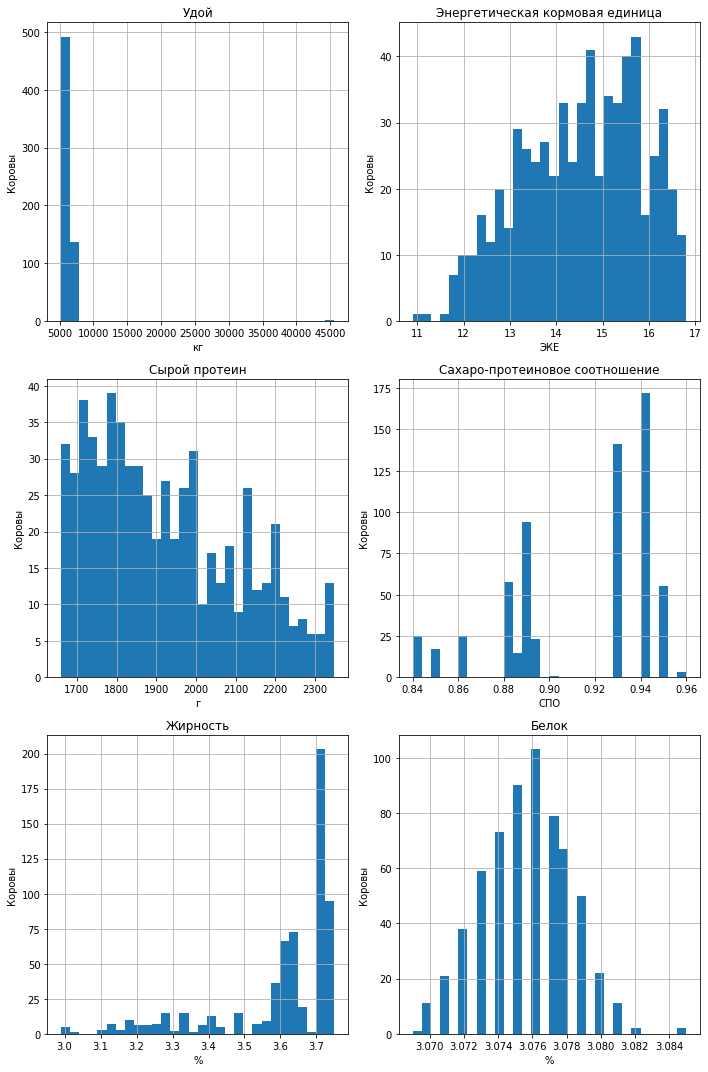

In [193]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = ['milk', 'efu', 'protein', 'sugar_protein', 'fat_pct', 'protein_pct'] # Колонки для анализа
titles = ['Удой', 'Энергетическая кормовая единица', 'Сырой протеин', 
          'Сахаро-протеиновое соотношение', 'Жирность', 'Белок']  # Заголовки для осей
xlabels = ['кг', 'ЭКЕ', 'г', 'СПО', '%', '%']  # Подписи оси х

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    farm[col].hist(ax=ax, bins=30, grid=True)
    ax.set(title=title, xlabel=xlabel, ylabel='Коровы')

plt.tight_layout()
plt.show()

**Комментарии**

Удой в размере 45616 кг выглядит как аномалия, учитывая, что 75% данных находятся к пределах 6501. Такой выброс требуется удалить. Показатель белка в молоке имеет нормальное распределение. Остальные показатели в распределении имеют множество скачков и распределены неравномерно, но значительных выбросов не наблюдается. Например, распределения сырого протеина в кормах бурёнок, СПО и ЭКЕ  говорят о том, что коров кормят по-разному, это может влиять на характеристики их молока. Анализируя молоко, можно сделать вывод, что молоко у бурёнок фермы довольно жирное, больше половины выше значения 3.6%, а показатель белка преимущественно в пределах 3.07%.

In [194]:
# Узнаем какое количество строк приходится на аномальные значения и выведем их

print('Количество строк с показателем удоя больше 7500 кг:',(farm['milk'] > 7500).sum())
display(farm[farm['milk'] > 7500])

Количество строк с показателем удоя больше 7500 кг: 1


,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age
16,17,45616,11.5,1675,0.93,айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


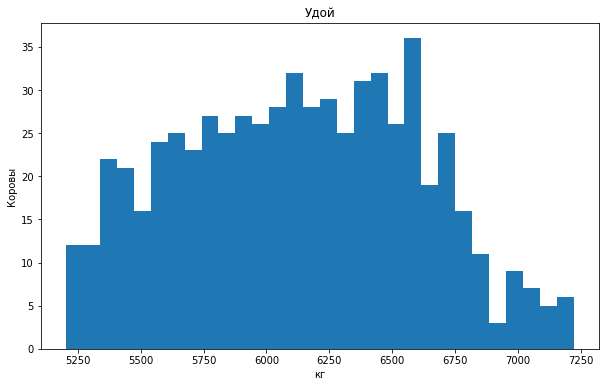

In [195]:
# Удаляем строку с анамалией

farm = farm[~(farm['milk'] > 7500)]

#Выводим обновленную гистаграмму

plt.figure(figsize=(10, 6))
farm['milk'].hist(bins=30, grid=True)
plt.title('Удой')
plt.xlabel('кг')
plt.ylabel('Коровы')
plt.grid()
plt.show()


**Комментарии**

Теперь гистограмма показателей удоя стала более читабельной, распределение имеет несколько скачков, но в целом равномерно, больше половины бурёнок соответствуют критериям фермера по удою не менее 6000 кг в год.

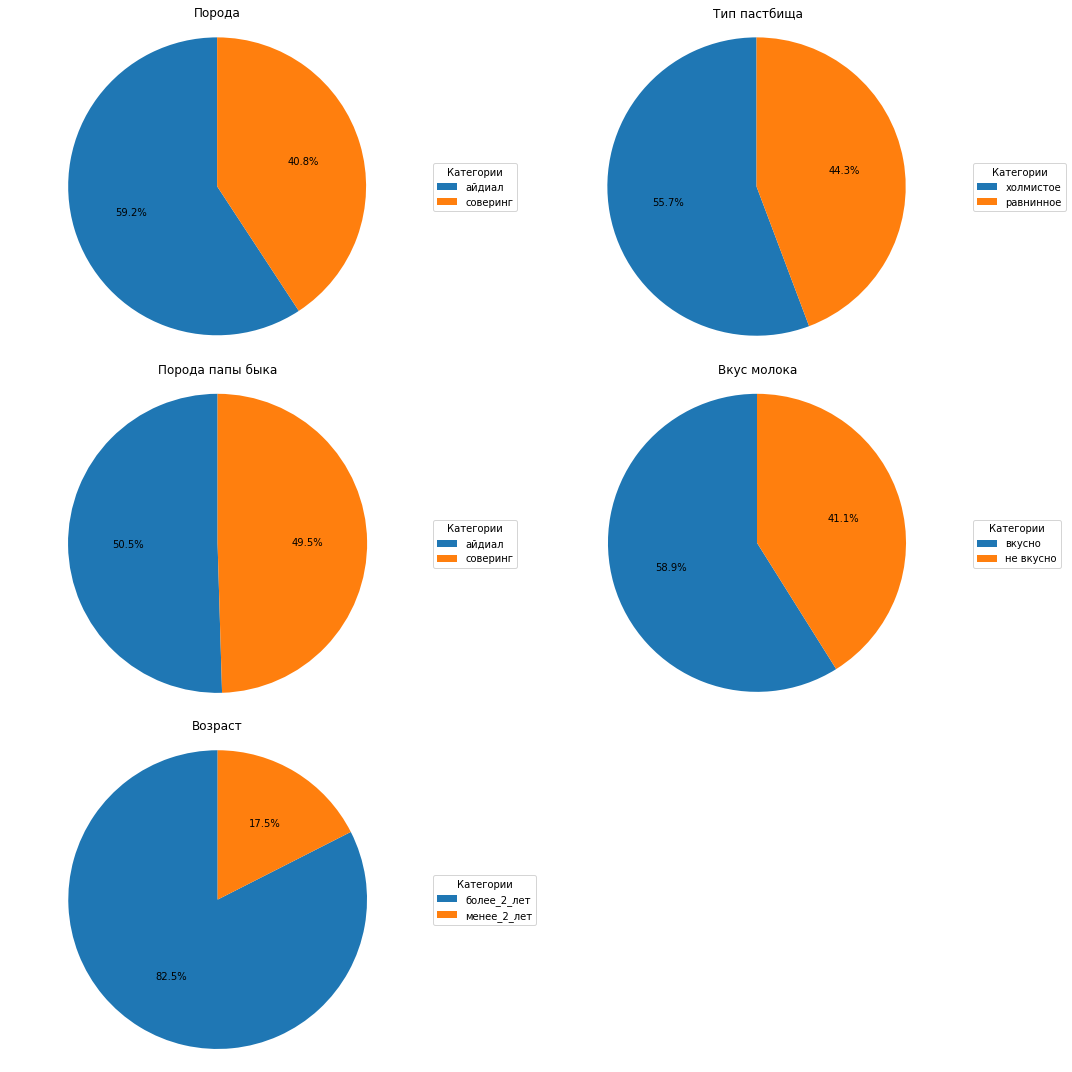

In [196]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = ['breed', 'pasture_type', 'dad_breed', 'milk_taste', 'age']  # Колонки для анализа
titles = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = farm[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

# Если количество колонок нечётное, последний график делаем невидимым
if len(columns) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()  # 
plt.show()

**Комментарии**

Проанализировав категориальные данные в датафрейме `farm` можно сделать следующие выводы:
- Более половины коров на фермы породы Вис Бик Айдиал (59.2%).
- Коровы больше пасутся на холмистых пастбищах (55.7), чем на равнинных (44.3%). 
- Соотношение пород пап быков практически равнозначно. 
- Около 60% молока - вкусное.
- Больше 80% коров в возрасте старше 2 лет.


### Датафрейм `dad`

In [197]:
# Статистическое описание колонок

print("Статистика:")
display(dad.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


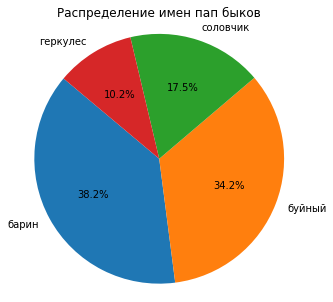

In [198]:
# Построим круговую диаграмму для столбца 'dad_name'

# Данные для круговой диаграммы

counts = dad['dad_name'].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
labels = counts.index  # Метки категорий
sizes = counts.values  # Доли значений

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг
plt.title("Распределение имен пап быков")
plt.show()



**Комментарии**

В датафрейме `dad` числовой столбец `id` неинформативен, так как содержит id бурёнок на ферме. Анализ данных в столбце `dad_name` показал, что большая часть бурёнок на ферме являются потомством двух быков, Барина и Буйного.

### Датафрейм `buy`

In [199]:
# Статистическое описание колонок

print("Статистика:")
display(buy.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
current_fat_pct,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
current_protein_pct,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


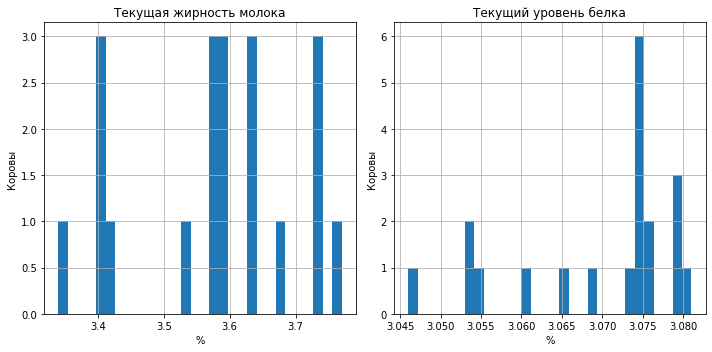

In [200]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = ['current_fat_pct', 'current_protein_pct']
titles = ['Текущая жирность молока', 'Текущий уровень белка']
xlabels = ['%', '%']

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    buy[col].hist(ax=ax, bins=30, grid=True)
    ax.set(title=title, xlabel=xlabel, ylabel='Коровы')

plt.tight_layout()
plt.show()

**Комментарии**

В датафрейме `buy` из числовых данных у нас два столбца: Текущая жирность молока и текущий уровень белка. В среднем жирность молока находится в пределах 3.5%, это хороший показатель, но немного ниже, чем у бурёнок на ферме, а уровень белка, наоборот, немного выше. Данные распределены неравномерно, но значительных выборосов в них нет.


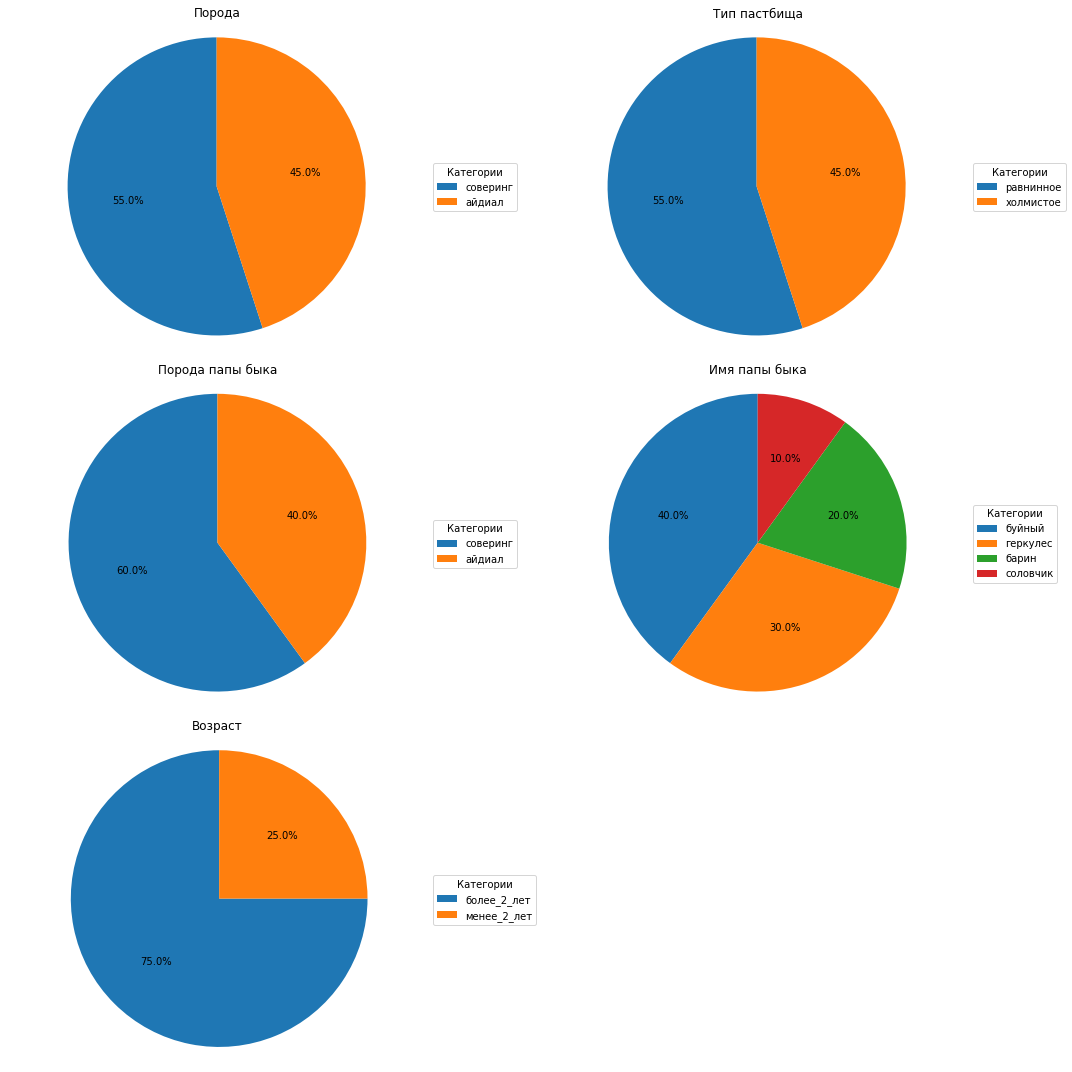

In [201]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age']  # Колонки для анализа
titles = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы быка', 'Возраст']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = buy[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

# Если количество колонок нечётное, последний график делаем невидимым
if len(columns) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()  # 
plt.show()

**Комментарии**

Проанализировав категориальные данные в датафрейме `buy` можно сделать выводы, что имеются различия между коровами на ферме и на продаже по характеристикам породы и типа пастбищ:
- Более половины коров на продажу породы Рефлешин Соверинг (55%).
- Коровы больше пасутся на ровнинных пастбищах (55%), чем на холмистых (45%).
- 60% пап быков породы Рефлешин Соверинг.
- Большая часть бурёнок на ферме являются потомством двух быков, Буйного и Геркулеса.
- 75% коров в возрасте старше 2 лет.


**Выводы**

На этапе исследовательского анализа данных были проанализированны все признаки, для количественных признаков были построены гистограммы, а для категориальных данных - круговые диаграммы. Мы сделали следующие выводы:
- Больше половины бурёнок на ферме соответствуют критериям фермера по удою не менее 6000 кг в год.
- Имеются различия между коровами на ферме и на продаже по характеристикам породы и типа пастбищ. На ферме больше половины коров породы Вис Бик Айдиал, а на продаже Рефлешин Соверинг. На ферме коровы больше пасутся на холмистых пастбищах, а на продаже на равнинных.
- Характеристики молока бурёнок на ферме имеют хорошие показатели с нормальным распределением, без значительных выбросов. Около 60% молока - вкусное.
- Распределения сырого протеина в кормах бурёнок, СПО и ЭКЕ говорят о том, что коров кормят по-разному, это может влиять на характеристики их молока.
- Большая часть коров как на ферме, так и на продаже старше 2 лет.
- У коров на продаже показатель жирности молока немного ниже, чем у бурёнок на ферме, а уровень белка, наоборот, немного выше. Данные распределены неравномерно, но значительных выборосов в них тоже нет.

В следующем разделе мы проведем корреляционный анализ для изучения взаимосвязи разных признаков и их влияния на качество и количество молока. 

## Корреляционный анализ

In [202]:
# Посчитаем коэффициенты корреляции между всеми признаками

corr_matrix = farm.corr()
display(corr_matrix)

,id,milk,efu,protein,sugar_protein,fat_pct,protein_pct
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
milk,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
efu,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
protein,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
sugar_protein,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat_pct,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein_pct,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


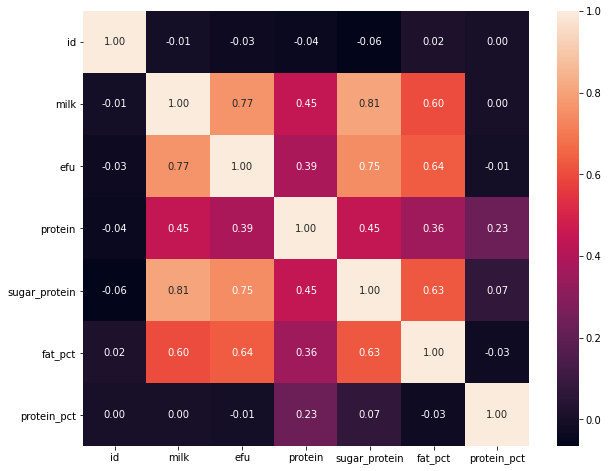

In [203]:
# Построим тепловую карту для показателей корреляции для датафрейма 'farm'

plt.figure(figsize=(10, 8))
sns.heatmap(farm.corr(), annot=True, fmt='.2f')
plt.show()


**Комментарии**

На тепловой карте светлые тона говорят о сильной линейной зависимости, а тёмные — о слабой. Судя по тепловой карте, самая сильная прямая связь с целевым признаком Удой (milk) у входных признаков СПО (sugar_protein) и ЭКЕ (efu), немного слабее, но тоже заметная с признаком Жирности % (fat_pct).

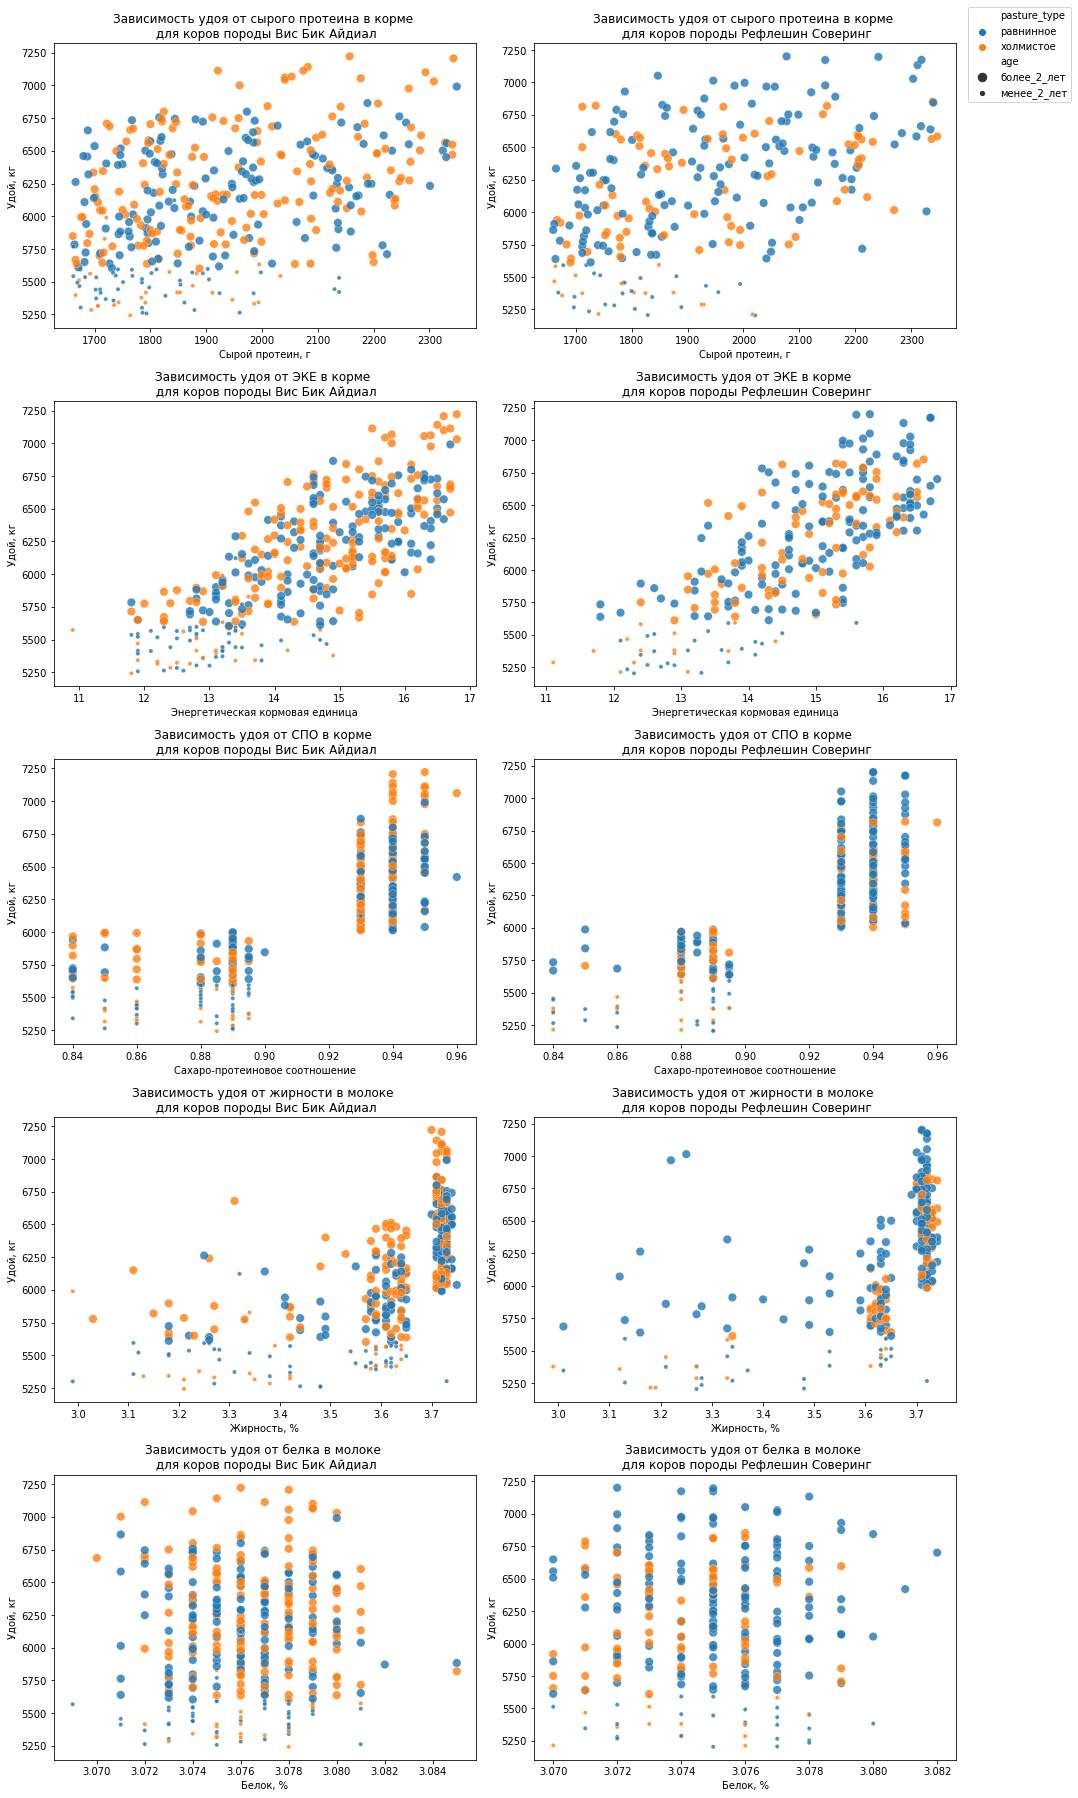

In [204]:
# Построим диаграммы рассеяния для признака Удой и всех количественных признаков с учётом значения категориальных признаков.

# Делим данные для двух разных пород 

ideal = farm.query("breed == 'айдиал'")
sovereign = farm.query("breed == 'соверинг'") 

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# 1 Зависимость Удоя от сырого протеина в корме, учивытая возраст и тип пастбища для коров породы Вис Бик Айдиал
sns.scatterplot(x='protein', y='milk', hue='pasture_type', size = 'age', data=ideal, alpha=0.8, ax=axes[0, 0])
axes[0, 0].set_title('Зависимость удоя от сырого протеина в корме \n для коров породы Вис Бик Айдиал')
axes[0, 0].set_xlabel('Сырой протеин, г') 
axes[0, 0].set_ylabel('Удой, кг')

# 2 Зависимость Удоя от сырого протеина в корме, учивытая возраст и тип пастбища для коров породы Рефлешин Соверинг 
sns.scatterplot(x='protein', y='milk', hue='pasture_type', size = 'age', data=sovereign, alpha=0.8, ax=axes[0, 1])
axes[0, 1].set_title('Зависимость удоя от сырого протеина в корме \n для коров породы Рефлешин Соверинг')
axes[0, 1].set_xlabel('Сырой протеин, г')
axes[0, 1].set_ylabel('Удой, кг')

# 3 Зависимость Удоя от ЭКЕ, учивытая возраст и тип пастбища для коров породы Вис Бик Айдиал
sns.scatterplot(x='efu', y='milk', hue='pasture_type', size = 'age', data=ideal, alpha=0.8, ax=axes[1, 0])
axes[1, 0].set_title('Зависимость удоя от ЭКЕ в корме \n для коров породы Вис Бик Айдиал')
axes[1, 0].set_xlabel('Энергетическая кормовая единица')
axes[1, 0].set_ylabel('Удой, кг')

# 4 Зависимость Удоя от ЭКЕ, учивытая возраст и тип пастбища для коров породы Рефлешин Соверинг 
sns.scatterplot(x='efu', y='milk', hue='pasture_type', size = 'age', data=sovereign, alpha=0.8, ax=axes[1, 1])
axes[1, 1].set_title('Зависимость удоя от ЭКЕ в корме \n для коров породы Рефлешин Соверинг')
axes[1, 1].set_xlabel('Энергетическая кормовая единица')
axes[1, 1].set_ylabel('Удой, кг')

# 5 Зависимость Удоя от СПО, учивытая возраст и тип пастбища для коров породы Вис Бик Айдиал
sns.scatterplot(x='sugar_protein', y='milk', hue='pasture_type', size = 'age', data=ideal, alpha=0.8, ax=axes[2, 0])
axes[2, 0].set_title('Зависимость удоя от СПО в корме \n для коров породы Вис Бик Айдиал')
axes[2, 0].set_xlabel('Сахаро-протеиновое соотношение')
axes[2, 0].set_ylabel('Удой, кг')

# 6 Зависимость Удоя от СПО, учивытая возраст и тип пастбища для коров породы Рефлешин Соверинг 
sns.scatterplot(x='sugar_protein', y='milk', hue='pasture_type', size = 'age', data=sovereign, alpha=0.8, ax=axes[2, 1])
axes[2, 1].set_title('Зависимость удоя от СПО в корме \n для коров породы Рефлешин Соверинг')
axes[2, 1].set_xlabel('Сахаро-протеиновое соотношение')
axes[2, 1].set_ylabel('Удой, кг')

# 7 Зависимость Удоя от жирности, учивытая возраст и тип пастбища для коров породы Вис Бик Айдиал
sns.scatterplot(x='fat_pct', y='milk', hue='pasture_type', size = 'age', data=ideal, alpha=0.8, ax=axes[3, 0])
axes[3, 0].set_title('Зависимость удоя от жирности в молоке \n для коров породы Вис Бик Айдиал')
axes[3, 0].set_xlabel('Жирность, %')
axes[3, 0].set_ylabel('Удой, кг')

# 8 Зависимость Удоя от жирности, учивытая возраст и тип пастбища для коров породы Рефлешин Соверинг 
sns.scatterplot(x='fat_pct', y='milk', hue='pasture_type', size = 'age', data=sovereign, alpha=0.8, ax=axes[3, 1])
axes[3, 1].set_title('Зависимость удоя от жирности в молоке \n для коров породы Рефлешин Соверинг')
axes[3, 1].set_xlabel('Жирность, %')
axes[3, 1].set_ylabel('Удой, кг')

# 9 Зависимость Удоя от белка, учивытая возраст и тип пастбища для коров породы Вис Бик Айдиал
sns.scatterplot(x='protein_pct', y='milk', hue='pasture_type', size = 'age', data=ideal, alpha=0.8, ax=axes[4, 0])
axes[4, 0].set_title('Зависимость удоя от белка в молоке \n для коров породы Вис Бик Айдиал')
axes[4, 0].set_xlabel('Белок, %')
axes[4, 0].set_ylabel('Удой, кг')

# 10 Зависимость Удоя от белка, учивытая возраст и тип пастбища для коров породы Рефлешин Соверинг 
sns.scatterplot(x='protein_pct', y='milk', hue='pasture_type', size = 'age', data=sovereign, alpha=0.8, ax=axes[4, 1])
axes[4, 1].set_title('Зависимость удоя от белка в молоке \n для коров породы Рефлешин Соверинг')
axes[4, 1].set_xlabel('Белок, %')
axes[4, 1].set_ylabel('Удой, кг')

# Объединяем лейблы для всех графиков
handles, labels = axes[0, 0].get_legend_handles_labels()

# Создаем общую легенду
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1))
plt.legend(loc='best')

# Скрываем лишние легенды на панелях
for row in range(len(axes)):
    for col in range(len(axes[0])):
        axes[row, col].get_legend().remove()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Корректируем пространство для легенды
plt.show()


**Выводы**

Проведя корреляционный анализ, можно сделать выводы, что наиболее выраженная связь между целевым признаком Удой у входных признаков СПО и ЭКЕ, немного слабее, но тоже заметная с признаком Жирности % (fat_pct). Опишем корреляцию между признаком Удой и другими количественными признаками:
- *Сырой протеин*: Взаимосвязь между содержанием сырого протеина и удоем не ясна. На графиках диаграмм рассеяния виден довольно большой разброс значений для обеих пород, однако наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная, больше похожа на линейную. Коэффициент корреляции: 0.45
- *ЭКЕ*: Наблюдается высокая положительная взаимосвязь, связь линейная. С увеличением удоя постепенно увеличивается и ЭКЕ. По графикам распределения, корреляция справедлива как для одной, так и для другой породы. Коэффициент корреляции: 0.77
- *СПО*: СПО также имеет высокую положительную взаимосвязь с целевым признаком, коэффициент корреляции: 0.81. Однако связь похожа на нелинейную, возможно это связано с распределением данных СПО.  
- *Жирность*: Между целевым признакои и показателем жирность молока в % имеется заметная положительная зависимость, связь линейная. Более всего связь раскрывается для значений жирности 3.6 и 3.7%. Коэффициент корреляции: 0.6
- *Белок*: Связь между этим признаком и целевым - нелинейная, зависимость отсутствует. Коэффициент корреляции: 0.  

Также важно отметить, что все значения для молодых бурёнок (младше 2 лет) значительно ниже показателей для бурёнок старше 2 лет.

Касательно мультиколлинеарности корреляционная матрица показала, что между некоторыми входными признаками есть умеренная, заметная и высокая корреляция, но нет явных признаков сильной мультиколлинеарности (коэффициента корреляции от 0.9 до 0.95 по модулю), поэтому говорить о мультиколлинеарности мы не можем. Яркие нелинейные связи не выявлены, в связи с чем добавление новых признаков - не требуется.

## Задача регрессии

### Обучение первой модели линейной регрессии

**Комментарии**

Для обучения модели линейной регрессии мы выбрали в качестве целевого признака Удой, кг (`milk`). В качесте входных признаков мы оставим ЭКЕ (`efu`), Сырой протеин (`protein`), СПО (`sugar_protein`), породы коровы и папы быка (`breed`, `dad_breed`), тип пастбища (`pasture_type`) и возраст  (`age`).  Мы отбросим показатели белка и жирности в процентах и вкуса полученного молока, так как эти показатели влиют не на удой, а на свойства полученного молока.

In [205]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Сохраняем выборки
X = farm.drop(['protein_pct', 'fat_pct', 'milk_taste'], axis=1)
y = farm['milk']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Сохраняем категориальные признаки и числовые в разные переменные
cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age']
num_col_names = ['efu', 'protein', 'sugar_protein']

In [206]:
# Кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Обучаем и преобразуем категориальные признаки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

# Сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names() 

In [207]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler = StandardScaler()

# Масштабируем тренировочную выборку
X_train_scaled =  scaler.fit_transform(X_train[num_col_names])

# Масштабируем тестовую выборку
X_test_scaled = scaler.transform(X_test[num_col_names])

In [208]:
# Объединим и обновим датафреймы

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [209]:
# Инициализация и обучение модели
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# Предсказанные значения для X_test
predictions = model_lr.predict(X_test)

# Вычисление метрики R2
r2_1 = r2_score(y_test, predictions) 
r2_1

0.7844078173416967

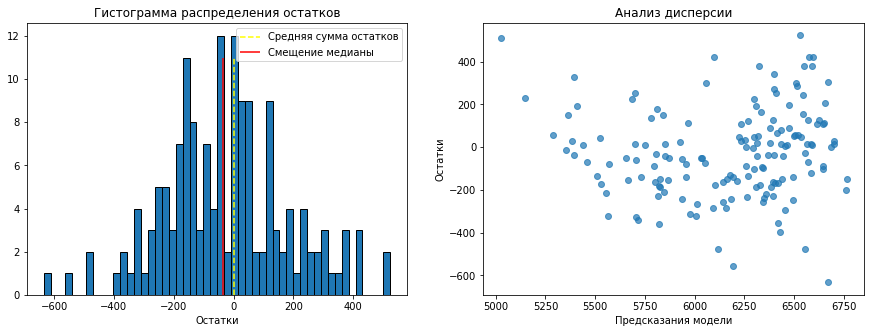

In [210]:
# Выделяем остатки
residuals_1 = y_test - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].hist(residuals_1, bins=50, edgecolor='black')
zero = axes[0].vlines(x=0, colors='yellow', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='red', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_1, alpha=0.7)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Комментарии**

R² принимает значения от - ∞ до 1. Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания. Метрика для первой модели составляет 0.784. Значение не довольно близко к 1, но недостаточно, необходимо улучшать модель.

Изученные свойства остатков во время анализа первой модели показали:
- *Случайность*: остатки в целом распределены нормально, но имеется немного выбросов, а также резких падений значение. График симметричен относительно самого частого значения, но  похож на расческу. Смещение медианы предсказаний минимально.
- *Устойчивость*: остатки в целом имеют постоянную дисперсию на всём интервале использования модели, но после прогноза в 6000 разброс остатков больше, чем в первой половине.

Модель требует улучшения, скорее всего есть какой-то паттерн, который она не уловила. Стоит дополнительно получить информацию по коровам, удой которых находится в интервале значений до 6000. Также необходимо исключить входные признаки, которые связаны с целевым нелинейно.

### Обучение второй модели линейной регрессии

**Комментарии**

Для улучшения модели линейной регрессии необходимо исключить нелинейность признаков. Так, например, СПО и Удой связаны нелинейно. На диаграмме рассеяния наблюдения сгруппированы в два кластера, границей между кластерами можно считать значение 0.92. Чтобы устранить нелинейность, необходимо преобразовать СПО в категориальный бинарный признак, использовав эту границу.

Кроме того, ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [211]:
new_column_farm = ['id', 'milk', 'efu', 'protein', 'sugar_protein', 'breed', 'pasture_type',
                   'dad_breed', 'fat_pct', 'protein_pct', 'milk_taste', 'age']

In [212]:
# Создадим копию датасета для обучения второй модели
farm_ml_2 = farm.copy(deep=True)

# Проверим результат
display(farm.shape)
display(farm.shape)
display(farm.head(5))

(628, 12)

(628, 12)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,14.2,1743,0.890,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет


In [213]:
#Переведём СПО в категориальный бинарный признак

farm_ml_2.loc[farm_ml_2['sugar_protein'] >= 0.92, 'sugar_protein'] = 1
farm_ml_2.loc[farm_ml_2['sugar_protein'] < 0.92, 'sugar_protein'] = 0

# Приводим тип данных к целым числам
farm_ml_2['sugar_protein'] = farm_ml_2['sugar_protein'].astype(int)

# Проверим результат
farm_ml_2.head(5)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,14.2,1743,0,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет


In [214]:
# Преобразуем признак ЭКЕ 

farm_ml_2['efu'] = farm_ml_2['efu'] ** 2

# Проверим результат
farm_ml_2.head(5)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,201.64,1743,0,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,163.84,2138,0,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет
2,3,5810,196.00,1854,0,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет
3,4,5895,153.76,2012,0,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,163.84,1675,0,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет


In [215]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Сохраняем выборки
X_2 = farm_ml_2.drop(['protein_pct', 'fat_pct', 'milk_taste'], axis=1)
y_2 = farm_ml_2['milk']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, 
    y_2, 
    random_state=RANDOM_STATE
)

# Сохраняем категориальные признаки и числовые в разные переменные
cat_col_names_2 = ['breed', 'pasture_type', 'dad_breed', 'age', 'sugar_protein']
num_col_names_2 = ['efu', 'protein']

In [216]:
# Кодируем категориальные признаки с помощью OneHotEncoder
encoder_2 = OneHotEncoder(drop='first', sparse=False)

# Обучаем и преобразуем категориальные признаки 
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names_2]) 
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2])

# Сохраним в переменной encoder_col_names_2 названия новых столбцов 
encoder_col_names_2 = encoder_2.get_feature_names() 

In [217]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_2 = StandardScaler()

# Масштабируем тренировочную выборку
X_train_scaled_2 =  scaler_2.fit_transform(X_train_2[num_col_names_2])

# Масштабируем тестовую выборку
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names_2])

In [218]:
# Объединим и обновим датафреймы

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

In [219]:
# Инициализация и обучение модели
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)

# Предсказанные значения для X_test
predictions_2 = model_lr_2.predict(X_test_2)

# Вычисление метрики R2
r2_2 = r2_score(y_test_2, predictions_2) 
r2_2

0.8180879926867501

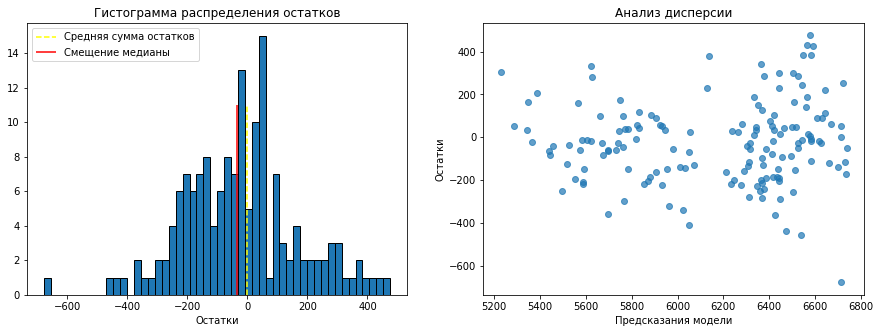

In [220]:
# Выделяем остатки
residuals_2 = y_test_2 - predictions_2

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].hist(residuals_2, bins=50, edgecolor='black')
zero = axes[0].vlines(x=0, colors='yellow', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='red', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions_2, residuals_2, alpha=0.7)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Комментарии**

По сравнению с первой моделью была устранена нелинейность в признаках. Метрика R² для второй модели выросла до 0.818 (для первой модели - 0.784). Распределение остатков также стало лучше. Рост есть, но всё ещё незначительный, этого недостаточно, необходимо улучшать модель.


### Обучение третьей модели линейной регрессии

**Комментарии**

Для обучения третьей модели мы добавим новый признак "Имя Папы" из датафрейма `dad`, соединив его с остальными данными в датафрейме `farm` по ключу.


In [221]:
# Объединим два датафрейма по ключу

farm_ml_3 = pd.merge(farm, dad, on = 'id')

# Проверим результат
farm_ml_3.head(5)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age,dad_name
0,1,5863,14.2,1743,0.890,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0.885,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет,барин


In [222]:
#Переведём СПО в категориальный бинарный признак

farm_ml_3.loc[farm_ml_3['sugar_protein'] >= 0.92, 'sugar_protein'] = 1
farm_ml_3.loc[farm_ml_3['sugar_protein'] < 0.92, 'sugar_protein'] = 0

# Приводим тип данных к целым числам
farm_ml_3['sugar_protein'] = farm_ml_3['sugar_protein'].astype(int)

# Проверим результат
farm_ml_3.head(5)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age,dad_name
0,1,5863,14.2,1743,0,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет,барин


In [223]:
# Преобразуем признак ЭКЕ 

farm_ml_3['efu'] = farm_ml_3['efu'] ** 2

# Проверим результат
farm_ml_3.head(5)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age,dad_name
0,1,5863,201.64,1743,0,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,163.84,2138,0,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,196.00,1854,0,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,153.76,2012,0,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,163.84,1675,0,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет,барин


In [224]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Сохраняем выборки
X_3 = farm_ml_3.drop(['protein_pct', 'fat_pct', 'milk_taste'], axis=1)
y_3 = farm_ml_3['milk']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, 
    y_3, 
    random_state=RANDOM_STATE
)

# Сохраняем категориальные признаки и числовые в разные переменные
cat_col_names_3 = ['breed', 'pasture_type', 'dad_breed', 'age', 'sugar_protein', 'dad_name']
num_col_names_3 = ['efu', 'protein']

In [225]:
# Кодируем категориальные признаки с помощью OneHotEncoder
encoder_3 = OneHotEncoder(drop='first', sparse=False)

# Обучаем и преобразуем категориальные признаки 
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names_3]) 
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3])

# Сохраним в переменной encoder_col_names_3 названия новых столбцов 
encoder_col_names_3 = encoder_3.get_feature_names() 

In [226]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_3 = StandardScaler()

# Масштабируем тренировочную выборку
X_train_scaled_3 =  scaler_3.fit_transform(X_train_3[num_col_names_3])

# Масштабируем тестовую выборку
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names_3])

In [227]:
# Объединим и обновим датафреймы

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

In [228]:
# Инициализация и обучение модели
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)

# Предсказанные значения для X_test
predictions_3 = model_lr_3.predict(X_test_3)

# Вычисление метрики R2
r2_3 = r2_score(y_test_3, predictions_3) 
r2_3

0.8247542745210406

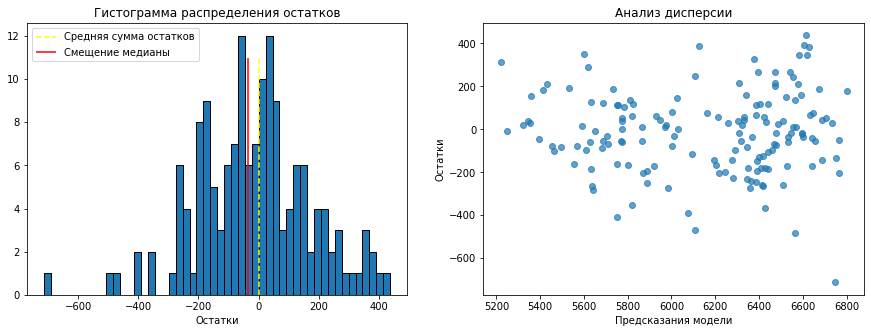

In [229]:
# Выделяем остатки
residuals_3 = y_test_3 - predictions_3

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].hist(residuals_3, bins=50, edgecolor='black')
zero = axes[0].vlines(x=0, colors='yellow', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='red', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions_3, residuals_3, alpha=0.7)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Комментарии**

В сравнении со второй моделью был добавлен новый признак Имя папы быка. Метрика R² для третьей модели также незначительно выросла и составляет 0.824 (0.784 → 0.818 → 0.824), это лучший показатель среди трех моделей. Распределение остатков также стало лучше, но все ещё есть выбросы, диаграмма рассеяния приняла практически хороший вид. Учитывая значение метрики и распределение, то можно сделать вывод, что лучшая модель - третья.

### Оценка качества моделей

In [230]:
# Метрики для первой модели

mse_1 = mean_squared_error(y_test, predictions)
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
mae_1 = mean_absolute_error(y_test, predictions)


In [231]:
# Метрики для второй модели

mse_2 = mean_squared_error(y_test_2, predictions_2)
rmse_2 = mean_squared_error(y_test_2, predictions_2, squared=False)
mae_2 = mean_absolute_error(y_test_2, predictions_2)

In [232]:
# Метрики для третьей модели

mse_3 = mean_squared_error(y_test_3, predictions_3)
rmse_3 = mean_squared_error(y_test_3, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test_3, predictions_3)


In [233]:
# Пропишем циклы, выводящие основные метрики

# Сравнение R2
r2_compared = {'первой': r2_1, 'второй': r2_2, 'третьей': r2_3}
for k, v in r2_compared.items():
    print(f'R2_score {k} модели: {v}')

print()

# Сравнение остатков
residuals_compared = {'первой': residuals_1, 'второй': residuals_2, 'третьей': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean()}')

print()    
    
# Сравнение MSE
mse_compared = {'первой': mse_1, 'второй': mse_2, 'третьей': mse_3}
for k, v in mse_compared.items():
    print(f'MSE {k} модели: {v}')

print()

# Сравнение RMSE
rmse_compared = {'первой': rmse_1, 'второй': rmse_2, 'третьей': rmse_3}
for k, v in rmse_compared.items():
    print(f'RMSE {k} модели: {v}')

print()

# Сравнение MAE
mae_compared = {'первой': mae_1, 'второй': mae_2, 'третьей': mae_3}
for k, v in mae_compared.items():
    print(f'MAE {k} модели: {v}')

R2_score первой модели: 0.7844078173416967
R2_score второй модели: 0.8180879926867501
R2_score третьей модели: 0.8247542745210406

Среднее значение остатков первой модели: -25.37328620820117
Среднее значение остатков второй модели: -24.37279813553191
Среднее значение остатков третьей модели: -15.201522000921388

MSE первой модели: 43887.015009660514
MSE второй модели: 37030.91131113695
MSE третьей модели: 35673.88988618195

RMSE первой модели: 209.4922791170608
RMSE второй модели: 192.43417396901452
RMSE третьей модели: 188.8753289505592

MAE первой модели: 164.24194463474925
MAE второй модели: 149.03965222364602
MAE третьей модели: 146.16302445362322


In [234]:
# Рассчитаем 95% доверительный интервал прогноза лучшей модели - третьей  

print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6092.340075854289, 6221.375070058381)


**Комментарии**

Оценка качества трех моделей линейной регрессии проводилась путем сравнения и сопоставления остаткой, метрик R², MSE, MAE и RMSE. На основании этих данных можно сделать вывод, что лучшая модель - третья. Модель в среднем ошибается на 188.87 кг в предсказаниях.

- MAE - 146.16302445362322
- MSE - 35673.88988618195
- RMSE - 188.8753289505592
- 95% доверительный интервал лучшей модели = (6092.340075854289, 6221.375070058381)


### Прогнозирования удоя коров на продаже

С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): 
- возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз удоя коров.

In [235]:
# Создадим копию датасета для прогнозирования удоя коров на продаже
cow_buy_ml = buy.copy(deep=True)

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = farm[['efu', 'protein', 'sugar_protein']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки и преобразовываем их
cow_buy_ml['efu'] = new_values['efu']
cow_buy_ml['efu'] = cow_buy_ml['efu'] ** 2
cow_buy_ml['protein'] = new_values['protein']
cow_buy_ml['sugar_protein'] = new_values['sugar_protein']
cow_buy_ml.loc[cow_buy_ml['sugar_protein'] >= 0.92, 'sugar_protein'] = 1
cow_buy_ml.loc[cow_buy_ml['sugar_protein'] < 0.92, 'sugar_protein'] = 0
cow_buy_ml['sugar_protein'] = cow_buy_ml['sugar_protein'].astype(int)

# Проверим результат
display(cow_buy_ml.shape)
display(cow_buy_ml.head(5))


(20, 10)

,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age,efu,protein,sugar_protein
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1
1,айдиал,равнинное,соверинг,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,1
2,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1
3,соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,1
4,соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,1


In [236]:
# Подготовим данные для модели
X_test_buy = cow_buy_ml.drop(['current_protein_pct', 'current_fat_pct'], axis=1)

# Сохраняем категориальные признаки и числовые в разные переменные
cat_col_names_buy = ['breed', 'pasture_type', 'dad_breed', 'age', 'sugar_protein', 'dad_name']
num_col_names_buy = ['efu', 'protein']

# Кодируем категориальные признаки с помощью OneHotEncoder
X_test_ohe_buy = encoder_3.transform(X_test_buy[cat_col_names_buy])

# Сохраним в переменной encoder_col_names_buy названия новых столбцов 
encoder_col_names_buy = encoder_3.get_feature_names() 

# Масштабируем количественные признаки с помощью StandardScaler.
X_test_scaled_buy = scaler_3.transform(X_test_buy[num_col_names_buy])

# Объединим и обновим датафрейм

X_test_ohe_buy = pd.DataFrame(X_test_ohe_buy, columns=encoder_col_names_buy)
X_test_scaled_buy = pd.DataFrame(X_test_scaled_buy, columns=num_col_names_buy)
X_buy = pd.concat([X_test_ohe_buy, X_test_scaled_buy], axis=1)

In [237]:
# Предсказанные значения удоя для коров на продаже

predictions_buy = model_lr_3.predict(X_buy)
cow_buy_ml['milk_pred'] = predictions_buy

# Проверяем результат
display(cow_buy_ml)


,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age,efu,protein,sugar_protein,milk_pred
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609.919297
1,айдиал,равнинное,соверинг,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,1,6378.711028
2,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283.999775
3,соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,1,6593.089377
4,соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,1,6542.146066
5,соверинг,равнинное,соверинг,геркулес,3.63,3.053,менее_2_лет,233.361138,2019.947532,1,6425.380218
6,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609.919297
7,айдиал,равнинное,соверинг,буйный,3.57,3.079,более_2_лет,233.361138,2019.947532,1,6571.259737
8,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283.999775
9,соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.361138,2019.947532,1,6400.540668


**Комментарии**

Мы получили предсказания показателей удоя для всех коров на продаже в ассоциации "ЭкоФерма". По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год, однако еще стоит предсказать, молоко каких коров будет вкусным.


**Выводы**

По результатам обучения трех моделей линейной регрессии и выявили лучшую модель (третью), показатели которой:
- MAE - 146.16302445362322
- MSE - 35673.88988618195
- RMSE - 188.8753289505592
- 95% доверительный интервал = (6092.340075854289, 6221.375070058381)

Мы использовали третью модель для предсказания показателей удоя для всех коров на продаже в ассоциации "ЭкоФерма". Получили предсказания по всем коровам продавца и добавили их в датафрейм. По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год, однако еще стоит предсказать, молоко каких коров будет вкусным.

## Задача классификации

### Обучение модели логистической регрессии

**Комментарии**

Для обучения модели логистической регрессии мы будем использовать уже подготовленные данные из третьей модели линейной регрессии. В качестве целевого признака мы выбрали Вкус молока (`milk_taste`), дополнительно преобразуем его в категориальный бинарный признак.  Мы отбросим показатели удоя (`milk`), так это показатель количества, а не свойств полученного молока.  

In [238]:
# Проверим датафрейм

display(farm_ml_3.head(5))

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age,dad_name
0,1,5863,201.64,1743,0,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,163.84,2138,0,айдиал,равнинное,соверинг,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,196.00,1854,0,соверинг,холмистое,соверинг,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,153.76,2012,0,соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,163.84,1675,0,айдиал,равнинное,соверинг,3.73,3.073,вкусно,менее_2_лет,барин


In [239]:
# Создадим копию датасета для обучения модели логистической регрессии
farm_log = farm_ml_3.copy(deep=True)

#Переведём Вкус молока в категориальный бинарный признак

farm_log.loc[farm_log['milk_taste'] == 'вкусно', 'milk_taste'] = 1
farm_log.loc[farm_log['milk_taste'] == 'не вкусно', 'milk_taste'] = 0

# Приводим тип данных к целым числам
farm_log['milk_taste'] = farm_log['milk_taste'].astype(int)

# Проверим результат
farm_log.head(5)

,id,milk,efu,protein,sugar_protein,breed,pasture_type,dad_breed,fat_pct,protein_pct,milk_taste,age,dad_name
0,1,5863,201.64,1743,0,айдиал,равнинное,айдиал,3.58,3.076,1,более_2_лет,буйный
1,2,5529,163.84,2138,0,айдиал,равнинное,соверинг,3.54,3.079,1,менее_2_лет,соловчик
2,3,5810,196.00,1854,0,соверинг,холмистое,соверинг,3.59,3.074,0,более_2_лет,барин
3,4,5895,153.76,2012,0,соверинг,холмистое,айдиал,3.40,3.075,0,более_2_лет,буйный
4,5,5302,163.84,1675,0,айдиал,равнинное,соверинг,3.73,3.073,1,менее_2_лет,барин


In [240]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Разбиваем признаки на входные и целевой
X_log = farm_log.drop(['milk_taste', 'milk'], axis = 1)
y_log = farm_log['milk_taste']

# разбиваем данные на тренировочную и тестовую выборки
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, 
    y_log, 
    random_state=RANDOM_STATE
)

# Сохраняем категориальные признаки и числовые в разные переменные
cat_col_names_log = ['breed', 'pasture_type', 'dad_breed', 'age', 'sugar_protein', 'dad_name']
num_col_names_log = ['efu', 'protein', 'fat_pct', 'protein_pct']

In [241]:
# Кодируем категориальные признаки с помощью OneHotEncoder
encoder_log = OneHotEncoder(drop='first', sparse=False)

# Обучаем и преобразуем категориальные признаки 
X_train_ohe_log = encoder_log.fit_transform(X_train_log[cat_col_names_log]) 
X_test_ohe_log = encoder_log.transform(X_test_log[cat_col_names_log])

# Сохраним в переменной encoder_col_names_log названия новых столбцов 
encoder_col_names_log = encoder_log.get_feature_names() 

In [242]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_log = StandardScaler()

# Масштабируем тренировочную выборку
X_train_scaled_log =  scaler_log.fit_transform(X_train_log[num_col_names_log])

# Масштабируем тестовую выборку
X_test_scaled_log = scaler_log.transform(X_test_log[num_col_names_log])

In [243]:
# Объединим и обновим датафреймы

X_train_ohe_log = pd.DataFrame(X_train_ohe_log, columns=encoder_col_names_log)
X_test_ohe_log = pd.DataFrame(X_test_ohe_log, columns=encoder_col_names_log)

X_train_scaled_log = pd.DataFrame(X_train_scaled_log, columns=num_col_names_log)
X_test_scaled_log = pd.DataFrame(X_test_scaled_log, columns=num_col_names_log)

X_train_log = pd.concat([X_train_ohe_log, X_train_scaled_log], axis=1)
X_test_log = pd.concat([X_test_ohe_log, X_test_scaled_log], axis=1)

In [244]:
# Создаём объект для работы с моделью
clf = LogisticRegression()

# Обучаем модель на данных
clf = clf.fit(X_train_log, y_train_log) 

# Получаем прогнозные метки классов
predictions_log = clf.predict(X_test_log)

# Проводим оценку метрик
clf_accuracy = accuracy_score(y_test_log, predictions_log)
clf_recall = recall_score(y_test_log, predictions_log)
clf_precision = precision_score(y_test_log, predictions_log)

print(f'Метрика Accuracy модели: {clf_accuracy}')
print(f'Метрика Recall модели: {clf_recall}')
print(f'Метрика Precision модели: {clf_precision}')


Метрика Accuracy модели: 0.6305732484076433
Метрика Recall модели: 0.8636363636363636
Метрика Precision модели: 0.6229508196721312


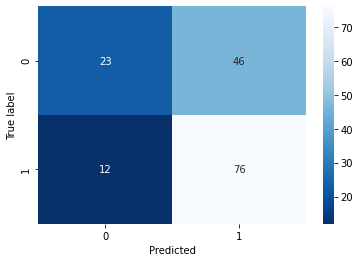

In [245]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test_log, predictions_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

**Комментарии**

Метрика Precision показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Она реагирует на ошибки первого рода, однако не реагирует на ошибки второго. Метрика, обратная Precision — Recall (полнота). Она измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Предсказания False Negative рассматриваются метрикой как «неучтённые» True Positive. Чем выше Recall, тем больше прогнозов Positive модель смогла дать верно. В нашем случае значения метрик следующие:  
- Метрика Accuracy: 0.6305732484076433
- Метрика Recall: 0.8636363636363636 
- Метрика Precision: 0.6229508196721312

Для фермера главное - вкус молока, то есть критичнее ошибка первого рода, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически не вкусным молоком. В таком случае можно сказать, что нам нужно максимизировать метрику Precision, необходимо, чтобы precision стремилась к 100%. Изменим порог классификации так, чтобы достичь этого значения.

### Анализ модели и выбор порога классификации

In [246]:
# Подберем порог классификации так, чтобы достичь значения 1.

threshold = 0.5
while True:
    threshold += 0.01
    y_pred = (clf.predict_proba(X_test_log)[:,1] >= threshold).astype(bool)
    if (precision_score(y_test_log, y_pred) == 1): break
print(f'Порог: {threshold}')


Порог: 0.8100000000000003


Метрика Accuracy модели: 0.47770700636942676
Метрика Recall модели: 0.06818181818181818
Метрика Precision модели: 1.0


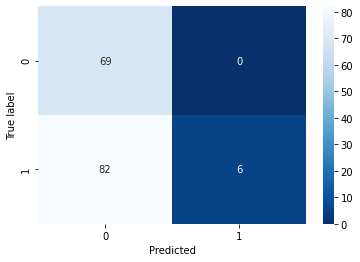

In [247]:
# Проверяем значения метрик с новым порогом

y_pred = (clf.predict_proba(X_test_log)[:,1] >= 0.81).astype(bool)
cm_2 = confusion_matrix(y_test_log, y_pred)

clf_accuracy_2 = accuracy_score(y_test_log, y_pred)
clf_recall_2 = recall_score(y_test_log, y_pred)
clf_precision_2 = precision_score(y_test_log, y_pred)

print(f'Метрика Accuracy модели: {clf_accuracy_2}')
print(f'Метрика Recall модели: {clf_recall_2}')
print(f'Метрика Precision модели: {clf_precision_2}')


sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 


**Комментарии**

При пороге в 0.81 количество ошибок первого рода равно нулю. Однако очень сильно упала метрика Recall (0.86 → 0.06), метрика Accuracy также снизилась (0.63 → 0.47). Такие показатели повышают вероятность того, что всем бурёнкам будет предсказано невкусное молоко, необходимо подобрать более низкий порог. 

In [248]:
# Более детальный перебор порогов

# Список для хранения результатов
results = []

# Перебор различных порогов 
thresholds =[round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]

for threshold in thresholds:
    
    y_pred_prob = (clf.predict_proba(X_test_log)[:,1] >= threshold).astype(bool)
    
    # Расчет метрик
    acc = accuracy_score(y_test_log, y_pred_prob)
    prec = precision_score(y_test_log, y_pred_prob)
    rec = recall_score(y_test_log, y_pred_prob)
    
    results.append({
        'Threshold': 'y_pred_'+str(threshold),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
    })

# Создание датафрейма из полученных результатов
df_results = pd.DataFrame(results)
display(df_results)

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Accuracy,Precision,Recall
0,y_pred_0.1,0.560510,0.560510,1.000000
1,y_pred_0.19,0.560510,0.560510,1.000000
2,y_pred_0.28,0.566879,0.564103,1.000000
3,y_pred_0.37,0.560510,0.565517,0.931818
4,y_pred_0.46,0.598726,0.595420,0.886364
5,y_pred_0.55,0.662420,0.654867,0.840909
6,y_pred_0.64,0.687898,0.774648,0.625000
7,y_pred_0.73,0.592357,0.833333,0.340909
8,y_pred_0.82,0.464968,1.000000,0.045455
9,y_pred_0.91,0.439490,0.000000,0.000000


Метрика Accuracy модели: 0.5923566878980892
Метрика Recall модели: 0.3409090909090909
Метрика Precision модели: 0.8333333333333334


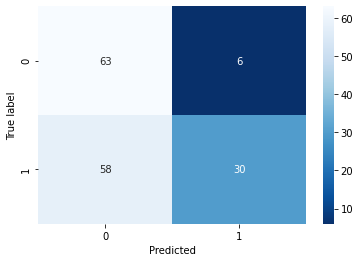

In [249]:
# Проверяем значения метрик с порогом 0.73

y_pred_073 = (clf.predict_proba(X_test_log)[:,1] >= 0.73).astype(bool)
cm_073 = confusion_matrix(y_test_log, y_pred_073)

clf_accuracy_073 = accuracy_score(y_test_log, y_pred_073)
clf_recall_073 = recall_score(y_test_log, y_pred_073)
clf_precision_073 = precision_score(y_test_log, y_pred_073)

print(f'Метрика Accuracy модели: {clf_accuracy_073}')
print(f'Метрика Recall модели: {clf_recall_073}')
print(f'Метрика Precision модели: {clf_precision_073}')


sns.heatmap(cm_073, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

**Комментарии** 

В рамках текущего шага была проанализирована обученная модель логистическое регрессии, посчитаны метрики, подобран порог для снижения количества ошибок первого рода. Мы предполагаем, что порог 0.73 можно считать оптимальным, поскольку при нем мы минимизировали количество ошибок FP до 6, но и сохраняем остальные метрики не на минимальных значениях, как при пороге 0.81. Прогнозирование вкуса молока будем проводить с этим порогом.

### Прогнозирования вкуса молока у коров на продаже

In [250]:
# Проверим датафрейм для прогнозирования удоя коров на продаже

display(cow_buy_ml.head(5))

,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age,efu,protein,sugar_protein,milk_pred
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609.919297
1,айдиал,равнинное,соверинг,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,1,6378.711028
2,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283.999775
3,соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,1,6593.089377
4,соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,1,6542.146066


In [251]:
# Подготовим данные для модели
X_test_log_buy = cow_buy_ml.drop(['milk_pred'], axis=1)

# Сохраняем категориальные признаки и числовые в разные переменные
cat_col_names_log_buy = ['breed', 'pasture_type', 'dad_breed', 'age', 'sugar_protein', 'dad_name']
num_col_names_log_buy = ['efu', 'protein', 'current_fat_pct', 'current_protein_pct']

In [252]:
# Кодируем категориальные признаки с помощью OneHotEncoder
X_test_ohe_log_buy = encoder_log.transform(X_test_log_buy[cat_col_names_log_buy])

# Сохраним в переменной encoder_col_names_log_buy названия новых столбцов 
encoder_col_names_log_buy = encoder_log.get_feature_names() 

# Масштабируем количественные признаки с помощью StandardScaler.
X_test_scaled_log_buy = scaler_log.transform(X_test_log_buy[num_col_names_log_buy])

# Объединим и обновим датафреймы
X_test_ohe_log_buy = pd.DataFrame(X_test_ohe_log_buy, columns=encoder_col_names_log_buy)
X_test_scaled_log_buy = pd.DataFrame(X_test_scaled_log_buy, columns=num_col_names_log_buy)
X_log_buy = pd.concat([X_test_ohe_log_buy, X_test_scaled_log_buy], axis=1)

In [253]:
# Предсказанные значений вкуса молока для коров на продаже

predictions_log_buy = (clf.predict_proba(X_log_buy)[:,1] >= 0.73).astype(bool)
cow_buy_ml['milk_taste_pred'] = predictions_log_buy
cow_buy_ml.loc[cow_buy_ml['milk_taste_pred'] == True, 'milk_taste_pred'] = 'вкусное'
cow_buy_ml.loc[cow_buy_ml['milk_taste_pred'] == False, 'milk_taste_pred'] = 'не вкусное'

# Проверяем результат
display(cow_buy_ml)


,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age,efu,protein,sugar_protein,milk_pred,milk_taste_pred
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609.919297,не вкусное
1,айдиал,равнинное,соверинг,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,1,6378.711028,не вкусное
2,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283.999775,не вкусное
3,соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,1,6593.089377,не вкусное
4,соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,1,6542.146066,не вкусное
5,соверинг,равнинное,соверинг,геркулес,3.63,3.053,менее_2_лет,233.361138,2019.947532,1,6425.380218,не вкусное
6,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609.919297,не вкусное
7,айдиал,равнинное,соверинг,буйный,3.57,3.079,более_2_лет,233.361138,2019.947532,1,6571.259737,не вкусное
8,соверинг,равнинное,соверинг,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283.999775,не вкусное
9,соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.361138,2019.947532,1,6400.540668,вкусное


In [254]:
# Выведем результат работы подели с рекомендованными коровами к покупке

to_buy = cow_buy_ml.loc[(cow_buy_ml['milk_pred'] > 6000) & (cow_buy_ml['milk_taste_pred'] == "вкусное")]
display(to_buy)

,breed,pasture_type,dad_breed,dad_name,current_fat_pct,current_protein_pct,age,efu,protein,sugar_protein,milk_pred,milk_taste_pred
9,соверинг,холмистое,айдиал,буйный,3.4,3.079,менее_2_лет,233.361138,2019.947532,1,6400.540668,вкусное


**Комментарии**

В рамках текущего шага была использована обученная модель логистическое регрессии для прогнозирования вкус молока для коров "ЭкоФермы" на продаже. По условию задачи классификации, мы можем рекомендовать фермеру для покупки только одну корову, с удоем более 6000 литров и вкусным молоком. Риск при ее покупке минимальный. 


**Выводы**

По результатам обучения модели логистической регрессии был предсказан вкус молока для всех коров на продаже в ассоциации "ЭкоФерма". Порог классификации был определен значением 0.73, ему соответсвуют следующие метрики:
- Метрика Accuracy: 0.5923566878980892
- Метрика Recall : 0.3409090909090909
- Метрика Precision : 0.8333333333333334

Мы получили предсказания по всем коровам продавца и добавили их в датафрейм. Для фермера главное - вкус молока, то есть критичнее ошибка первого рода, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически не вкусным молоком. 

По условию задачи классификации, мы можем рекомендовать фермеру для покупки только одну корову, с удоем более 6000 литров и вкусным молоком. Риск при ее покупке минимальный. Такая ситуация сложилась из-за того, что был подобран порог для сведения снижения количества ошибок первого рода. Для дальнейшей настройки модели требуется согласование с фермером на какой процент риска он готов пойти при покупке коров в свое стадо. 

## Итоговые выводы

Фермер, владелец молочного хозяйства «Вольный луг», хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям. Наша задача — проанализировать данные, разработать две прогнозные модели для отбора бурёнок в поголовье по целевым признакам (Удой и Вкус молока). Результаты анализа позволят сформулировать рекомендации относительно критериев отбора новых бурёнок, а разработанные модели машинного обучения помогут фермеру управлять рисками и принимать объективное решение об их покупке для расширения стада, учитывая их удой и вкус молока. 

Для настоящего проекта нам были предоставлены подробные данные о поголовье коров молочного хозяйства "Вольный луг" и о коровах на продаже в ассоциации пастбищ "ЭкоФерма". 

В **первом разделе** проекта мы изучили общую информацию о данных. Нам для анализа были предоставлены три датасета, которые Полученные данные мы сохранили в три переменные: `farm` для датафрейма с данными о стаде фермера на текущий момент, `dad` для данных о быках-папах каждой коровы в стаде фермера, и `buy` для данных о коровах "ЭкоФермы". 

Во **втором разделе** проекта мы провели основную предобработку данных в датафреймах, которая включала в себя переименование и  приведение названий столбцов к нижнему регистру, преобразование типа данных в столбцах, где это необходимо, обработку явных и неявных дубликатов. Пропусков в данных нет.

В **третьем разделе** проекта мы провели исследовательский анализ данных и сделали следующие выводы:
- Больше половины бурёнок на ферме соответствуют критериям фермера по удою не менее 6000 кг в год.
- Имеются различия между коровами на ферме и на продаже по характеристикам породы и типа пастбищ. На ферме больше половины коров породы Вис Бик Айдиал, а на продаже Рефлешин Соверинг. На ферме коровы больше пасутся на холмистых пастбищах, а на продаже на равнинных.
- Характеристики молока бурёнок на ферме имеют хорошие показатели с нормальным распределением, без значительных выбросов. Около 60% молока - вкусное.
- Распределения сырого протеина в кормах бурёнок, СПО и ЭКЕ говорят о том, что коров кормят по-разному, это может влиять на характеристики и качество молока.
- Большая часть коров как на ферме, так и на продаже старше 2 лет.
- У коров на продаже показатель жирности молока немного ниже, чем у бурёнок на ферме, а уровень белка, наоборот, немного выше. Данные распределены неравномерно, но значительных выборосов в них тоже нет.

В **четвертом разделе** проекта мы провели корреляционный анализ, который показал, что наиболее выраженная связь между целевым признаком Удой у входных признаков СПО и ЭКЕ. Немного слабее, но тоже заметна корреляция с признаком Жирности % (fat_pct). Корреляция между признаком Удой и другими количественными признаками:
- *Сырой протеин*: Взаимосвязь между содержанием сырого протеина и удоем не ясна. На графиках диаграмм рассеяния виден довольно большой разброс значений для обеих пород, однако наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная, больше похожа на линейную. Коэффициент корреляции: 0.45
- *ЭКЕ*: Наблюдается высокая положительная взаимосвязь, связь линейная. С увеличением удоя постепенно увеличивается и ЭКЕ. По графикам распределения, корреляция справедлива как для одной, так и для другой породы. Коэффициент корреляции: 0.77
- *СПО*: СПО также имеет высокую положительную взаимосвязь с целевым признаком, коэффициент корреляции: 0.81. Однако связь похожа на нелинейную, возможно это связано с распределением данных СПО.  
- *Жирность*: Между целевым признакои и показателем жирность молока в % имеется заметная положительная зависимость, связь линейная. Более всего связь раскрывается для значений жирности 3.6 и 3.7%. Коэффициент корреляции: 0.6
- *Белок*: Связь между этим признаком и целевым - нелинейная, зависимость отсутствует. Коэффициент корреляции: 0.  

Также важно отметить, что все значения для молодых бурёнок (младше 2 лет) значительно ниже показателей для бурёнок старше 2 лет. Касательно мультиколлинеарности корреляционная матрица показала, что между некоторыми входными признаками есть умеренная, заметная и высокая корреляция, но нет явных признаков сильной мультиколлинеарности (коэффициента корреляции от 0.9 до 0.95 по модулю), поэтому говорить о мультиколлинеарности мы не можем. Яркие нелинейные связи не выявлены, в связи с чем добавление новых признаков - не требуется.

В **пятом разделе** проекта мы обучили три модели линейной регрессии и выявили лучшую модель (третью), показатели которой:
- MAE - 146.16302445362322
- MSE - 35673.88988618195
- RMSE - 188.8753289505592
- 95% доверительный интервал = (6092.340075854289, 6221.375070058381)

Мы использовали третью модель для предсказания показателей удоя для всех коров на продаже в ассоциации "ЭкоФерма". Получили предсказания по всем коровам продавца и добавили их в датафрейм. По условию задачи регрессии, мы можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год.

В **шестом разделе** проекта мы обучили модели логистической регрессии и предсказали вкус молока для всех коров на продаже в ассоциации "ЭкоФерма". Порог классификации был определен значением 0.73, ему соответсвуют следующие метрики:
- Метрика Accuracy: 0.5923566878980892
- Метрика Recall : 0.3409090909090909
- Метрика Precision : 0.8333333333333334

Мы получили предсказания по всем коровам продавца и добавили их в датафрейм. Для фермера главное - вкус молока, то есть критичнее ошибка первого рода, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически не вкусным молоком.

Подводя итог, по условию задачи классификации, мы можем рекомендовать фермеру для покупки только одну корову, с удоем более 6000 литров и вкусным молоком. Риск при ее покупке минимальный. Такая ситуация сложилась из-за того, что был подобран порог для сведения снижения количества ошибок первого рода. Для улучшения качества регрессионых моделей были использованы стандартизация и кодирование категориальных признаков. При анализе экономических рисков и других вопросов важны метрики Precision и Recall, которые позволяют отследить ошибки первого или второго рода и минимизировать экономические убытки. Для дальнейшей настройки модели требуется согласование с фермером на какой процент риска он готов пойти при покупке коров в свое стадо. 


<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера 2**:
     Анастасия, спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
**Удачи и увидимся в Практикуме!**